In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 


DATASET EXAMINATION


In [3]:
df=pd.read_csv('data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.info(),
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


(62184, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_people,62184.0,29.072543,22.689026,0.00,9.0,28.00,43.00,145.00
timestamp,62184.0,45799.437958,24211.275891,0.00,26624.0,46522.50,66612.00,86399.00
day_of_week,62184.0,2.982504,1.996825,0.00,1.0,3.00,5.00,6.00
is_weekend,62184.0,0.282870,0.450398,0.00,0.0,0.00,1.00,1.00
is_holiday,62184.0,0.002573,0.050660,0.00,0.0,0.00,0.00,1.00
temperature,62184.0,58.557108,6.316396,38.14,55.0,58.34,62.28,87.17
is_start_of_semester,62184.0,0.078831,0.269476,0.00,0.0,0.00,0.00,1.00
is_during_semester,62184.0,0.660218,0.473639,0.00,0.0,1.00,1.00,1.00
month,62184.0,7.439824,3.445069,1.00,5.0,8.00,10.00,12.00
hour,62184.0,12.236460,6.717631,0.00,7.0,12.00,18.00,23.00


In [6]:
df['day_of_week'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [7]:
df['day_of_week']=df['day_of_week']+1
df['day_of_week'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [8]:
df['date']=pd.to_datetime(df['date'],utc=True )

In [9]:
df['Year']=df['date'].dt.year

In [10]:
df.drop('date',axis=1,inplace=True)

In [11]:
df.isnull().sum()

number_people           0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
Year                    0
dtype: int64

In [12]:
cols=[c for c in df.columns if c not in ["timestamp", "temperature","number_people"]]

for col in cols:
    general_ratios=df[col].value_counts(normalize=True)*100
    print(f"Column: {col}")
    print(general_ratios)
    print("-"*30)
    


Column: day_of_week
day_of_week
2    14.682233
3    14.442622
4    14.354175
1    14.212659
6    14.186929
7    14.100090
5    14.021292
Name: proportion, dtype: float64
------------------------------
Column: is_weekend
is_weekend
0    71.712981
1    28.287019
Name: proportion, dtype: float64
------------------------------
Column: is_holiday
is_holiday
0    99.742699
1     0.257301
Name: proportion, dtype: float64
------------------------------
Column: is_start_of_semester
is_start_of_semester
0    92.116943
1     7.883057
Name: proportion, dtype: float64
------------------------------
Column: is_during_semester
is_during_semester
1    66.021806
0    33.978194
Name: proportion, dtype: float64
------------------------------
Column: month
month
12    12.023993
10    11.681461
11    11.433809
9     11.118616
8      9.791908
7      7.151357
3      6.968030
5      6.802393
1      6.506497
6      6.336035
2      5.768365
4      4.417535
Name: proportion, dtype: float64
----------------------

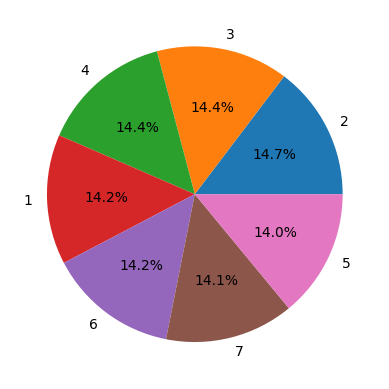

In [13]:
ratio_days=(df['day_of_week'].value_counts()/len(df))
plt.pie(ratio_days,autopct='%1.1f%%',labels=ratio_days.index)
plt.show()


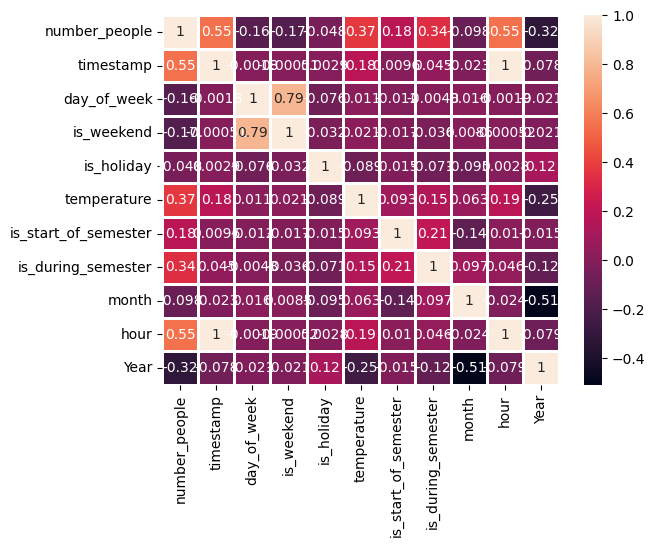

In [14]:
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

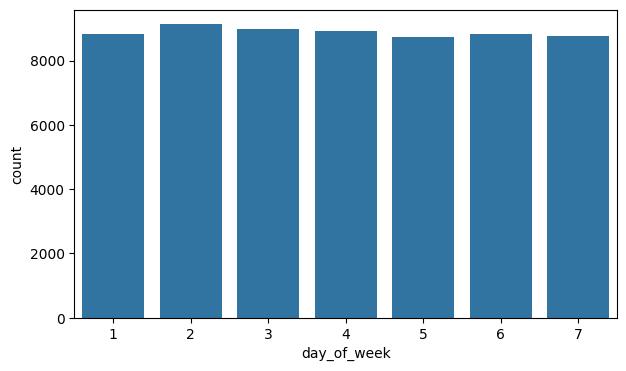

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='day_of_week',data=df)
plt.show()

In [16]:
graph_cols=["hour","temperature","month","day_of_week"]

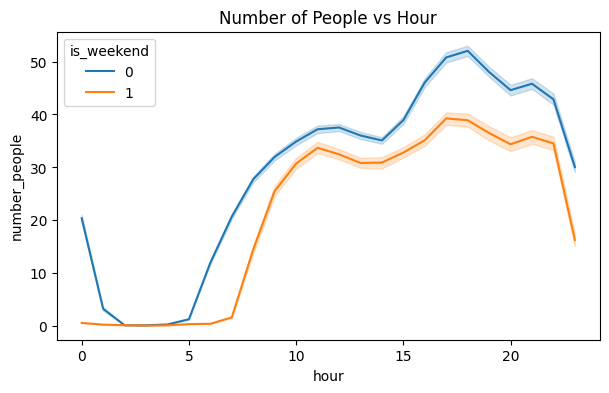

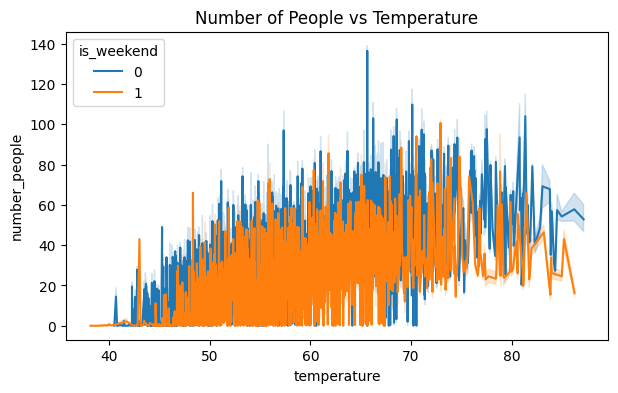

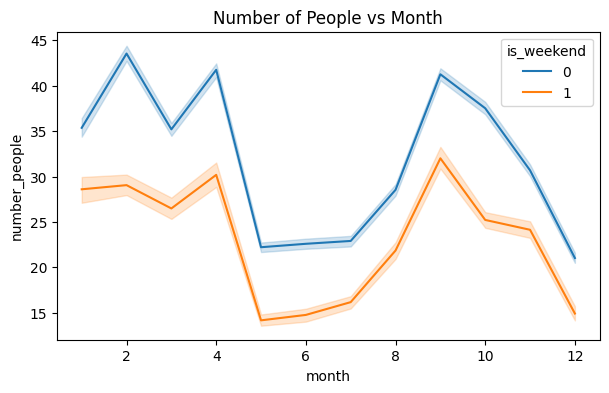

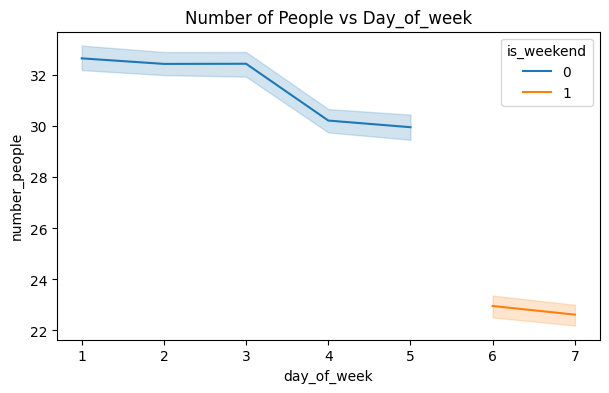

In [17]:
for col in graph_cols:
    plt.figure(figsize=(7,4))
    sns.lineplot(x=col,y='number_people',hue="is_weekend",data=df)
    plt.title(f'Number of People vs {col.capitalize()}')
    plt.show()

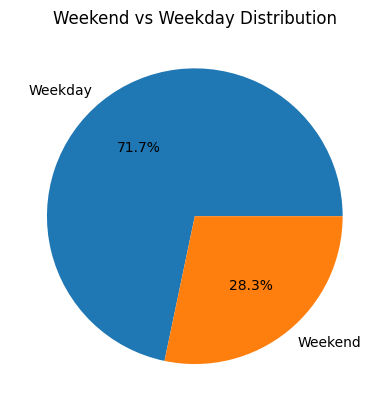

In [18]:
days=df['is_weekend'].value_counts()
plt.pie(days,labels=['Weekday','Weekend'],autopct='%1.1f%%')
plt.title('Weekend vs Weekday Distribution')
plt.show()

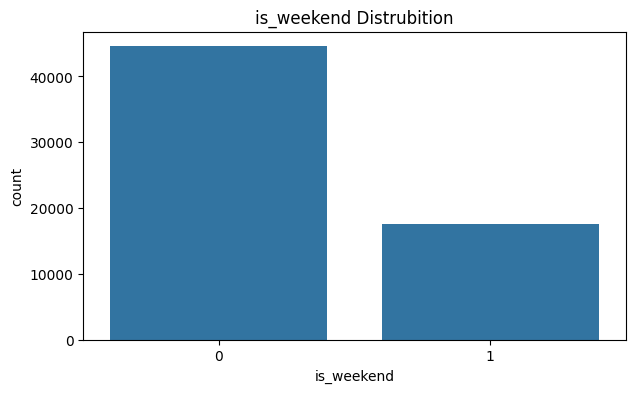

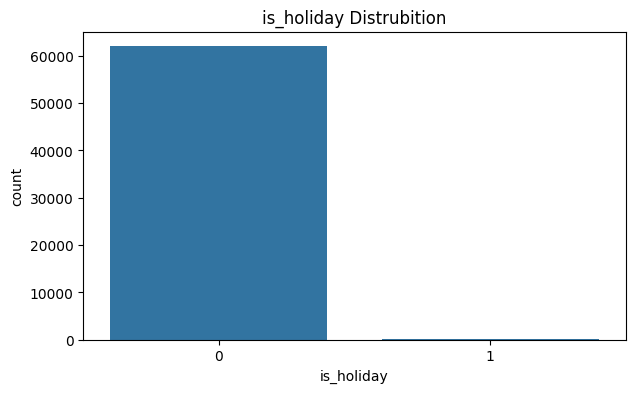

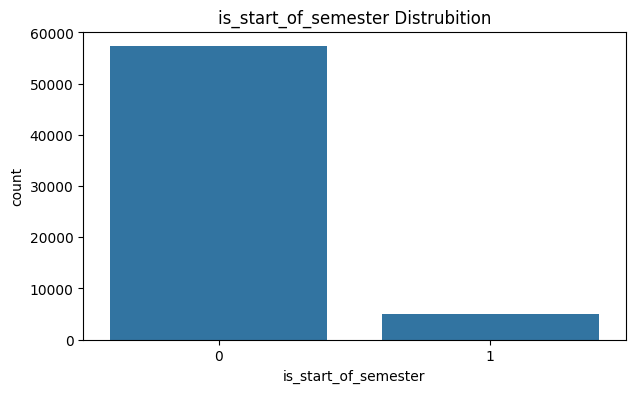

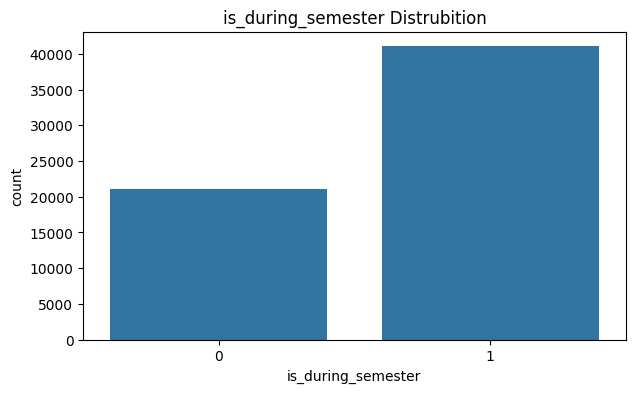

In [19]:
day_columns=['is_weekend','is_holiday','is_start_of_semester','is_during_semester']

for col in day_columns:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col,data=df)
    plt.title(f'{col} Distrubition')
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [21]:
X=df.drop('number_people',axis=1)
y=df['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cols=["temperature","timestamp"]
preprocessor=ColumnTransformer(transformers=[
    ('numeric',RobustScaler(),cols)],remainder="passthrough")
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [22]:
def cv_check(model):
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    train_score=r2_score(y_train,y_train_pred)
    test_score=r2_score(y_test,y_test_pred)

    print("Train R2:",train_score)
    print("Test R2:",test_score)
    
    if (train_score-test_score)>0.35:
        print("Model is overfitting")
    elif (train_score and test_score) <0.5:
        print("Model is underfitting")
    else:
        print("Model is good")
        print("-------------------")
        
        print('MSE: ', mean_squared_error(y_test,y_test_pred))
        print('RMSE:', np.sqrt(mean_squared_error(y_test,y_test_pred)))
        print('MAE: ', mean_absolute_error(y_test,y_test_pred))
        print('R2 Score: ', r2_score(y_test,y_test_pred))
        
        
    


In [23]:
def run_model(model):
    pipe=Pipeline(steps=[
        ('model',model)
    ])
    pipe.fit(X_train,y_train)
    cv_check(model)
    
    
    return model

In [25]:
models={
    'LinearRegression':LinearRegression(n_jobs=-1),
    'RidgeCV':RidgeCV(),
    'LassoCV':LassoCV(n_jobs=-1),
    'ElasticNetCV':ElasticNetCV(n_jobs=-1),
    'RandomForestRegressor':RandomForestRegressor(n_jobs=-1),
    'SVR':SVR(kernel='linear'),
    'KNeighborsRegressor':KNeighborsRegressor(n_jobs=-1),
}

In [28]:
for name,model in models.items():
    print(f"Model: {name}")
    run_model(model)
    print("*"*50)


Model: LinearRegression
Train R2: 0.5999441253350941
Test R2: 0.5995998266867297
Model is good
-------------------
MSE:  207.71713659735227
RMSE: 14.412395241504871
MAE:  10.773733019754552
R2 Score:  0.5995998266867297


LinearRegression(n_jobs=-1)

**************************************************
Model: RidgeCV
Train R2: 0.5999439806526664
Test R2: 0.5995978747815166
Model is good
-------------------
MSE:  207.71814919472064
RMSE: 14.412430370854203
MAE:  10.773607946964507
R2 Score:  0.5995978747815166


RidgeCV()

**************************************************
Model: LassoCV
Train R2: 0.5992858323204471
Test R2: 0.5993113539382203
Model is good
-------------------
MSE:  207.8667887136611
RMSE: 14.417586091772128
MAE:  10.77086735288156
R2 Score:  0.5993113539382203


LassoCV(n_jobs=-1)

**************************************************
Model: ElasticNetCV
Train R2: 0.5802829964923177
Test R2: 0.5803027873652352
Model is good
-------------------
MSE:  217.72793584226488
RMSE: 14.755606928969913
MAE:  11.074202961891118
R2 Score:  0.5803027873652352


ElasticNetCV(n_jobs=-1)

**************************************************
Model: RandomForestRegressor
Train R2: 0.99049893359782
Test R2: 0.9297499425493336
Model is good
-------------------
MSE:  36.44389226583857
RMSE: 6.036877691807129
MAE:  4.06782455480383
R2 Score:  0.9297499425493336


RandomForestRegressor(n_jobs=-1)

**************************************************
Model: SVR
Train R2: 0.3691011966709814
Test R2: 0.34922653864436926
Model is underfitting


SVR(kernel='linear')

**************************************************
Model: KNeighborsRegressor
Train R2: 0.9438740005419756
Test R2: 0.9006923489011206
Model is good
-------------------
MSE:  51.51821178740854
RMSE: 7.177618810400044
MAE:  4.780316796655142
R2 Score:  0.9006923489011206


KNeighborsRegressor(n_jobs=-1)

**************************************************


In [37]:
rfc_params={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':[None,2,3,5,10],
    'min_samples_split':[2,5,10],
}
knn_params={
    'n_neighbors':[3,5,7,9,11],
}


In [34]:
rscv_rfc=RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=100,n_jobs=-1),
                        param_distributions=rfc_params,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1,
                        verbose=1
)
rscv_knn=RandomizedSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),
                            param_distributions=knn_params,
                            cv=5,
                            scoring='r2',
                            n_jobs=-1,
                            verbose=1)

In [35]:
run_model(rscv_rfc)
print("Best Parameters for RandomForestRegressor:",rscv_rfc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train R2: 0.9904840239021383
Test R2: 0.9296514333852692
Model is good
-------------------
MSE:  36.494996243438635
RMSE: 6.0411088587641455
MAE:  4.070298863095398
R2 Score:  0.9296514333852692


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='r2', verbose=1)

Best Parameters for RandomForestRegressor: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'squared_error'}


In [40]:
run_model(rscv_knn)
print("Best Parameters for KNeighborsRegressor:",rscv_knn.best_params_)   

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train R2: 0.9651619126904003
Test R2: 0.9168793265045986
Model is good
-------------------
MSE:  43.120831211528326
RMSE: 6.566645354481109
MAE:  4.3247299723942
R2 Score:  0.9168793265045986


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11]},
                   scoring='r2', verbose=1)

Best Parameters for KNeighborsRegressor: {'n_neighbors': 3}
